In [83]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from subprocess import check_output


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib as mpl

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable


In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [87]:
print('train size',train.shape)
print('test size',test.shape)
#velkost dát

train size (891, 21)
test size (418, 20)


In [35]:
print(train.info())
print('...')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
WikiId         889 non-null float64
Name_wiki      889 non-null object
Age_wiki       887 non-null float64
Hometown       889 non-null object
Boarded        889 non-null object
Destination    889 non-null object
Lifeboat       345 non-null object
Body           87 non-null object
Class          889 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage: 146.3+ KB
None
...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns 

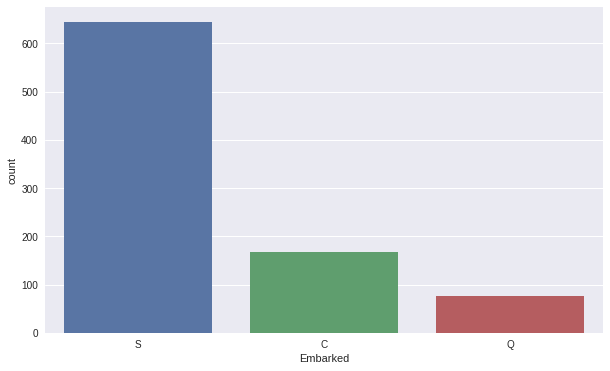

In [6]:
#Počet cestujúcich nalodených v rôznych prístavoch
plt.figure(figsize=(10,6))
mpl.style.use('seaborn')
sns.countplot(train.Embarked)
plt.show()

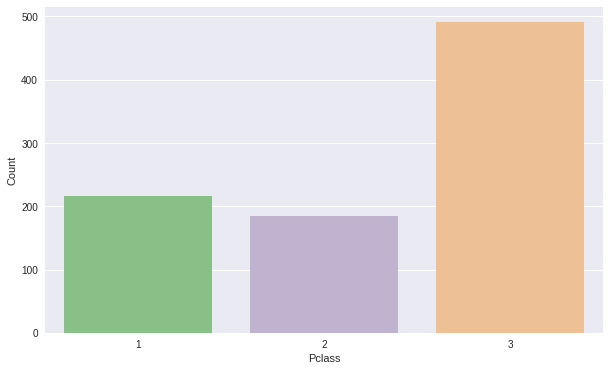

In [88]:
#Počet ľudí v každej triede
plt.figure(figsize=(10,6))
mpl.style.use('seaborn')
sns.countplot(train.Pclass,palette='Accent')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


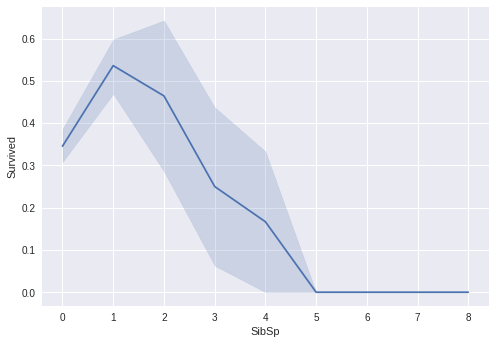

In [89]:
#pomer prežitia k počtu súrodencov
sns.lineplot(y=train.Survived,x=train.SibSp)
plt.show()


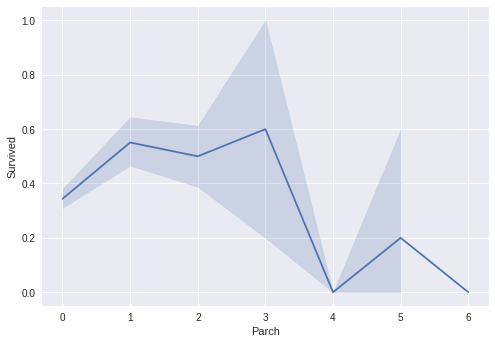

In [90]:
#pomer prežitia k počtu rodičov
sns.lineplot(y=train.Survived,x=data_train.Parch)
plt.show()


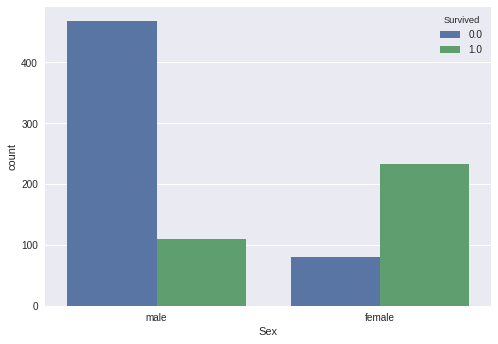

In [91]:
#šanca na prežitie podla pohlavia
sns.countplot(x=train.Sex,hue=data_train.Survived)

In [93]:
print('accuracy ',metrics.accuracy_score(y_test,y_vc_pre1))
print(metrics.classification_report(y_test,y_vc_pre1))

print(metrics.confusion_matrix(y_test,y_vc_pre1))

print('precision',metrics.precision_score(y_test,y_vc_pre1))
print('recall',metrics.recall_score(y_test,y_vc_pre1))
print('F1',metrics.f1_score(y_test,y_vc_pre1))
print('roc_auc_score',metrics.roc_auc_score(y_test,y_vc_pre1))

accuracy  0.9720670391061452
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       109
         1.0       1.00      0.93      0.96        70

   micro avg       0.97      0.97      0.97       179
   macro avg       0.98      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179

[[109   0]
 [  5  65]]
precision 1.0
recall 0.9285714285714286
F1 0.962962962962963
roc_auc_score 0.9642857142857143


In [70]:
def batch_generator(x_train, y_train, batch_size=256):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1]), dtype='float32')
    y_batch = np.empty((batch_size), dtype='float32')
    
    yes_idx = np.where(y_train == 1.)[0]
    non_idx = np.where(y_train == 0.)[0]
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
        
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch
        
def train_model(model, lr, nb_epochs):
    model.compile(optimizer=Adam(lr), loss = 'binary_crossentropy', metrics=['accuracy'])
    hist = model.fit_generator(batch_generator(train_X, train_y, batch_size), 
                           validation_data=(valid_X, valid_y), 
                           verbose=0, epochs=nb_epochs,
                           steps_per_epoch=train_X.shape[0]//batch_size)
    return model, hist

In [71]:
def plot_hist(hist, N):
    train_loss ,= plt.plot(np.convolve(hist.history['loss'], np.ones((N,))/N, mode='valid'), color='b', label='training loss')
    val_loss ,= plt.plot(hist.history['val_loss'], color='r', label='validation loss')
    plt.ylabel('Loss')
    plt.legend(handles=[train_loss, val_loss])
    plt.show()
    train_acc ,= plt.plot(np.convolve(hist.history['acc'], np.ones((N,))/N, mode='valid'), color='b', label='training accuracy')
    val_acc ,= plt.plot(np.convolve(hist.history['val_acc'], np.ones((N,))/N, mode='valid'), color='r', label='validation accuracy')
    plt.ylabel('Accuracy')
    plt.legend(handles=[train_acc, val_acc])
    plt.show()

In [97]:
seeds = np.arange(3)

full = train.append( test , ignore_index = True )
titanic = full[ :891 ]

del train , test
sort=False

In [98]:
# pohlavie ako 0 a 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
#nova premenna pre kazdu hodnotu Embarked, class
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )

pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
# vytvorenie datasetu
imputed = pd.DataFrame()
# chybajuci 'Age' nahradený priemerným
imputed[ 'Has_Age' ] = full.Age.notnull()
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )
# chýbajuci 'Fare' nahradený priemerným
imputed[ 'Has_Fare' ] = full.Fare.notnull()
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

In [99]:
title = pd.DataFrame()
# tituly zo záznamov
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

#agregovanie titulov
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

name = pd.DataFrame()
name['Name'] = full[ 'Name' ].map( lambda name: name.split( ',' )[0].strip() )

#mapovanie titulov
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )

cabin = pd.DataFrame()

#chýbajuci cabin = U (unknown - neznámy)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapovanie cabinov
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# duplicitné hodnoty
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )



#funkcia, ktorá extrahuje každú predponu lístka, vráti 'XXX', ak nie je predpona (t. j. lístok je číslica)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

#vytiahnutie duplicitných ticketov
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )



family = pd.DataFrame()

# velkost rodiny
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# ktoré funkcie / premenné sa majú zahrnúť do datasetu
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X = pd.concat( [ imputed.drop('Fare', axis=1) , pclass , sex , family, title, ticket ] , axis=1 )
full_X.head()

,Has_Age,Age,Has_Fare,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,Master,Miss,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,True,22.0,True,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,38.0,True,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,26.0,True,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,True,35.0,True,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
4,True,35.0,True,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
#trénovanie
# Vytvorenie datasetov, ktoré sú potrebné na trenovanie, validáciu a testovanie modelov
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ].as_matrix()
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

train_X = train_X.as_matrix()
valid_X = valid_X.as_matrix()
train_y = train_y.as_matrix()
valid_y = valid_y.as_matrix()

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 51) (623, 51) (268, 51) (623,) (268,) (418, 51)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Me

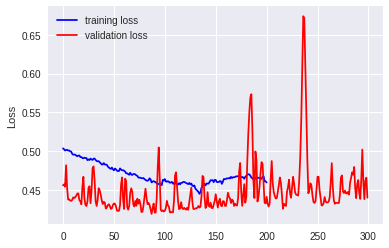

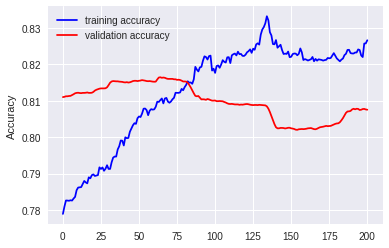

seed 0 crossval accuracy 0.8074400720329606


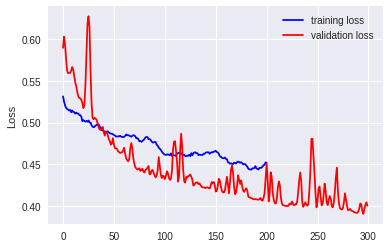

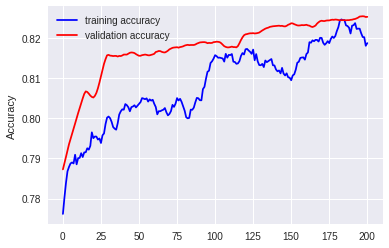

seed 1 crossval accuracy 0.8253052910133024


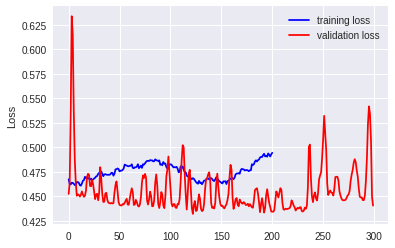

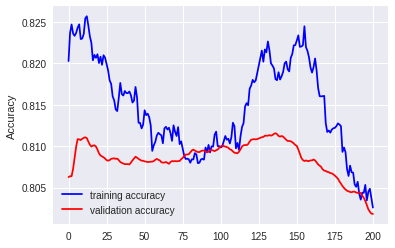

seed 2 crossval accuracy 0.8017488316085638


In [79]:
hists = []
models = []
promising_seeds = []

#test a výber vhodných seedov
for a_seed in seeds:
    
    model = Sequential()
    model.add(Dense(train_X.shape[1]+10, activation='relu',input_shape=train_X.shape[1:]))
   
    model.add(Dense(30, activation='relu'))
    
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    batch_size = 256
    
    np.random.seed(a_seed)
    #nižšia miera učenia,zabezpečí sa konvergencia
    model, hist = train_model(model, 6e-4, 200)
    # rýchlejšia konvergencia
    model, hist = train_model(model, 9e-4, 300)
    hists.append(hist)
    models.append(model)
    plot_hist(hist, 100)
    print("seed", a_seed, "crossval accuracy", np.mean(hist.history['val_acc'][-100:-1]))
   #ak má model aspoň 55% presnosť validácie
    if np.mean(hist.history['val_acc'][-100:-1]) > 0.55:
        promising_seeds.append(a_seed)

In [101]:
# trénovanie validnych modelov
best_seed = 0
best_acc = 0.0

good_seeds = []
for a_seed in promising_seeds:
    #pridá sa konvergenčný čas
    models[a_seed], hists[a_seed] = train_model(models[a_seed], 9e-4, 200)
    acc = np.mean(hists[a_seed].history['val_acc'][-100:-1])
    print("seed", a_seed, "crossval accuracy", acc)
    if acc >0.6:
        good_seeds.append(a_seed)
    if acc > best_acc:
        best_seed = a_seed
        best_acc = acc

seed 0 crossval accuracy 0.8287728032734389
seed 1 crossval accuracy 0.8342755925649974
seed 2 crossval accuracy 0.8296396811138211


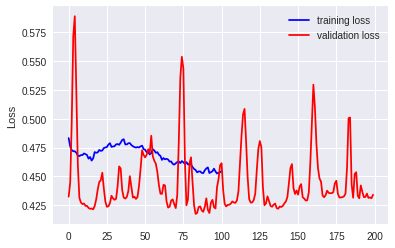

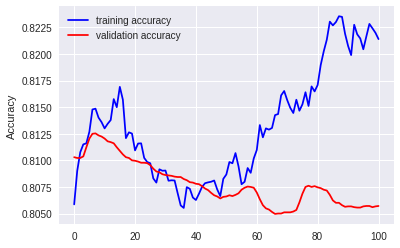

0.8055932457839204


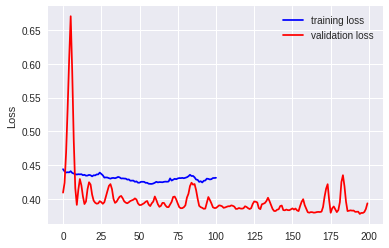

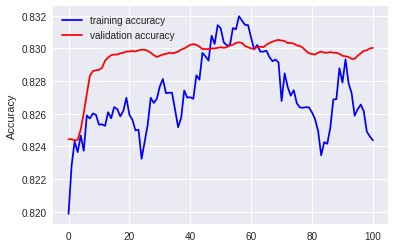

best seed
0.8300165829751247


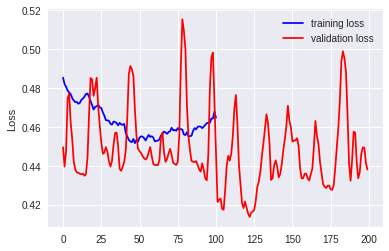

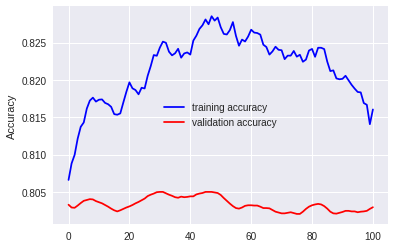

0.8029172325429021


In [81]:
#vykreslenie všetkych modely, overí sa, či sa vybrali najlepšie
for a_seed in seeds:
    hist = hists[a_seed]
    plot_hist(hist, 100)
    if a_seed == best_seed:
        print("best seed")
    print(np.mean(hist.history['val_acc'][-100:-1]))

In [102]:
#Predikcia a výstup
prediction = models[best_seed].predict(test_X)[:,0]
test_y = (prediction + 0.5).astype("int")
ids = full[891:]['PassengerId']
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': test_y })
output.to_csv('submission.csv', index = False)
output.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
